In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("used_cars_data.csv")
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# EDA

In [3]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [4]:
df.index

RangeIndex(start=0, stop=7253, step=1)

In [5]:
df.shape

(7253, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [7]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [8]:
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [9]:
df.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [10]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [11]:
features_with_na = [i for i in df.columns if df[i].isnull().sum()>=1]
features_with_na

['Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']

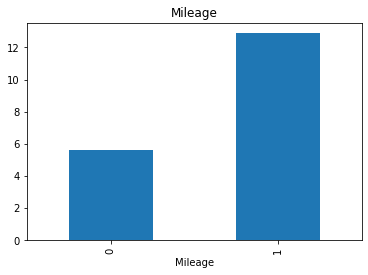

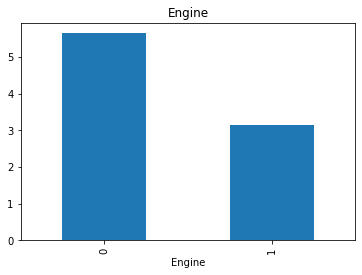

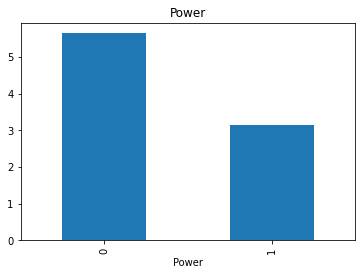

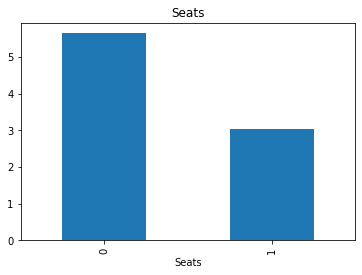

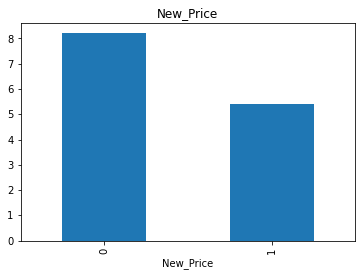

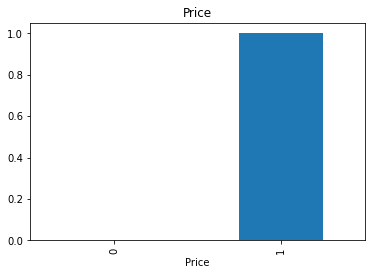

In [13]:
for i in features_with_na:
    df_temp = df.copy()
    df_temp[i] = np.where(df_temp[i].isnull(), 1, 0)
    df_temp.groupby(i)['Price'].median().plot.bar()
    plt.title(i)
    plt.show()

In [15]:
numerical_features = [i for i in df.columns if df[i].dtypes!='object']
numerical_features

['S.No.', 'Year', 'Kilometers_Driven', 'Seats', 'Price']

In [14]:
df[numerical_features].head()

,S.No.,Year,Kilometers_Driven,Seats,Price
0,0,2010,72000,5.0,1.75
1,1,2015,41000,5.0,12.50
2,2,2011,46000,5.0,4.50
3,3,2012,87000,7.0,6.00
4,4,2013,40670,5.0,17.74


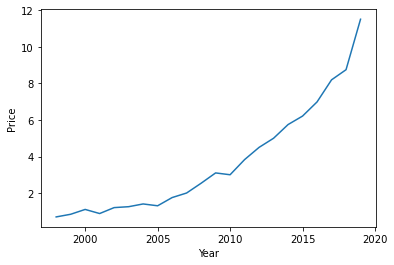

In [15]:
# plt.figure(figsize=(20,10)) 
df.groupby('Year')['Price'].median().plot()
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

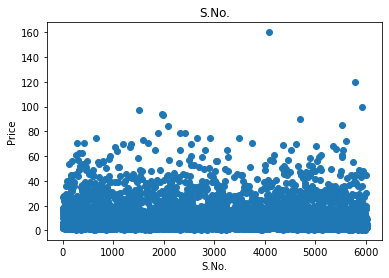

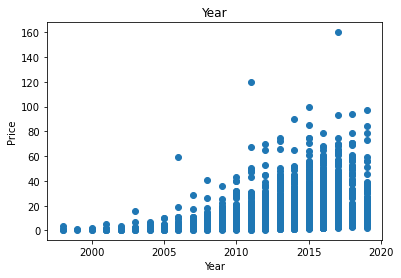

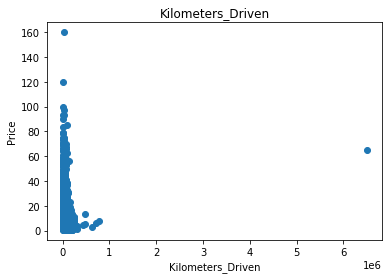

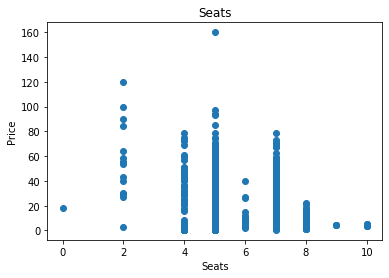

In [16]:
for i in numerical_features[:-1]:
    plt.scatter(df[i], df['Price'])
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.title(i)
    plt.show()

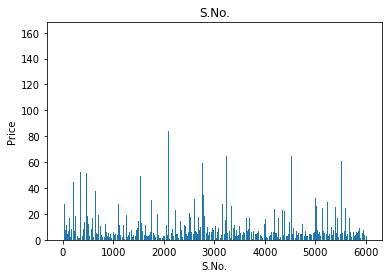

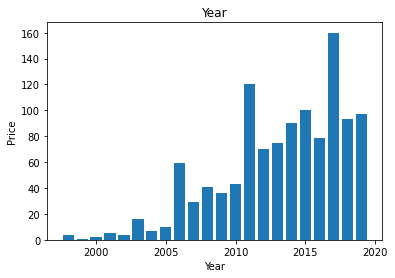

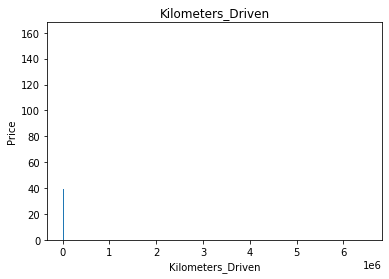

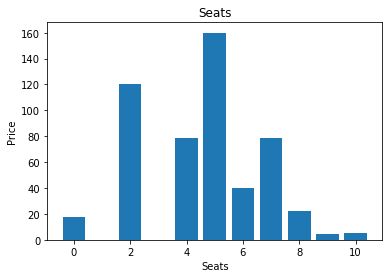

In [17]:
for i in numerical_features[:-1]:
    plt.bar(df[i], df["Price"])
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.title(i)
    plt.show()

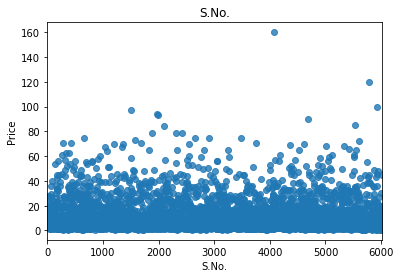

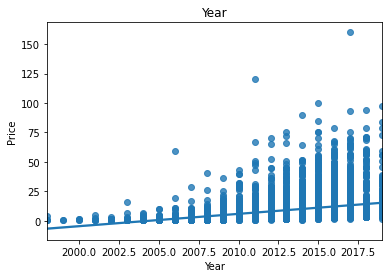

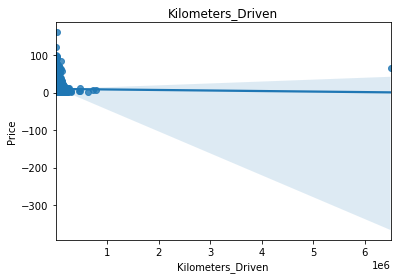

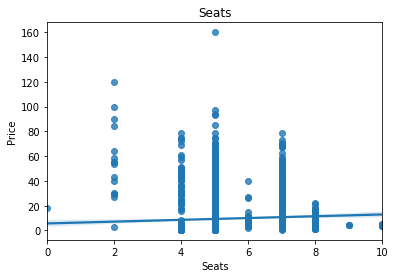

In [17]:
for i in numerical_features[:-1]:
    sns.regplot(x=df[i], y=df["Price"], data=df)
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.title(i)
    plt.show()

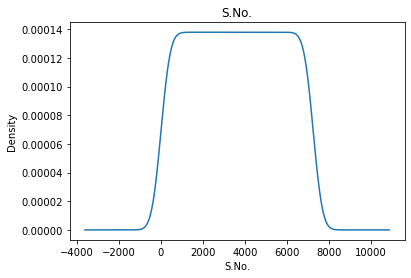

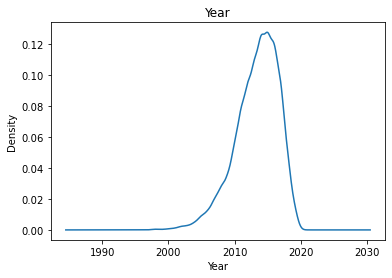

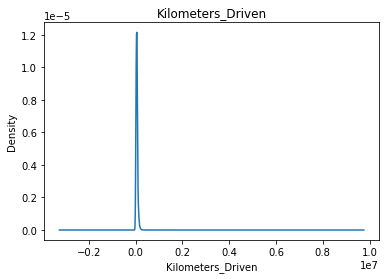

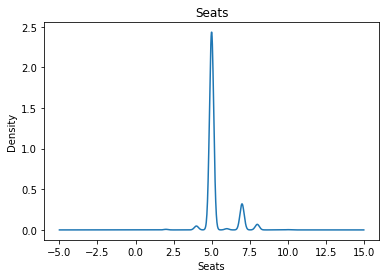

In [18]:
for i in numerical_features[:-1]:
    df[i].plot.kde()
    plt.xlabel(i)
    plt.ylabel("Density")
    plt.title(i)
    plt.show()

In [19]:
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [20]:
df.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [21]:
discrete_features = [i for i in numerical_features if len(df[i].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_features)))
print(discrete_features)

Discrete Variables Count: 2
['Year', 'Seats']


In [22]:
df[discrete_features].head()

,Year,Seats
0,2010,5.0
1,2015,5.0
2,2011,5.0
3,2012,7.0
4,2013,5.0


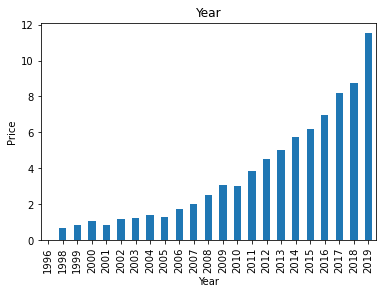

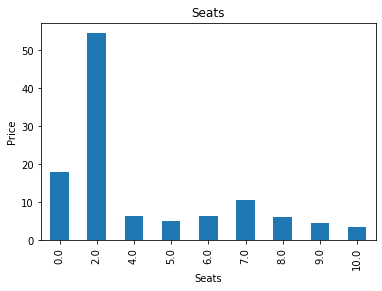

In [23]:
for i in discrete_features:
    df.groupby(i)["Price"].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.title(i)
    plt.show()

In [24]:
continuous_features = [i for i in numerical_features if i not in discrete_features]
print("Continuous feature Count {}".format(len(continuous_features)))
print(continuous_features)

Continuous feature Count 3
['S.No.', 'Kilometers_Driven', 'Price']


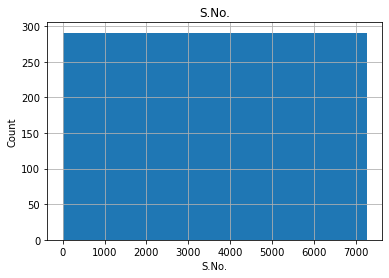

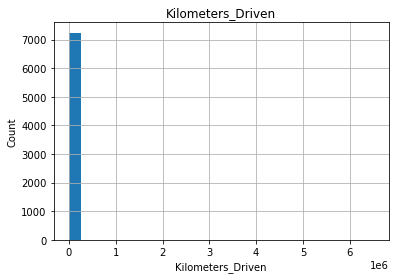

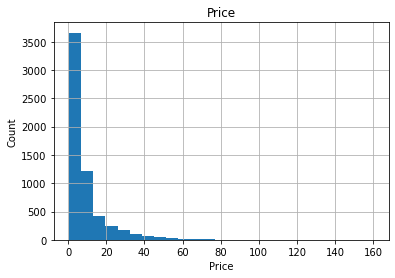

In [25]:
for i in continuous_features:
    df[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()

In [26]:
categorical_features = [i for i in df.columns if df[i].dtypes=='object']
categorical_features

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'New_Price']

In [27]:
df[categorical_features].head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,NaN
2,Honda Jazz V,Chennai,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,NaN


In [28]:
for i in categorical_features:
    print('{} feature has {} number of categories'.format(i, len(df[i].unique())))

Name feature has 2041 number of categories
Location feature has 11 number of categories
Fuel_Type feature has 5 number of categories
Transmission feature has 2 number of categories
Owner_Type feature has 4 number of categories
Mileage feature has 451 number of categories
Engine feature has 151 number of categories
Power feature has 387 number of categories
New_Price feature has 626 number of categories


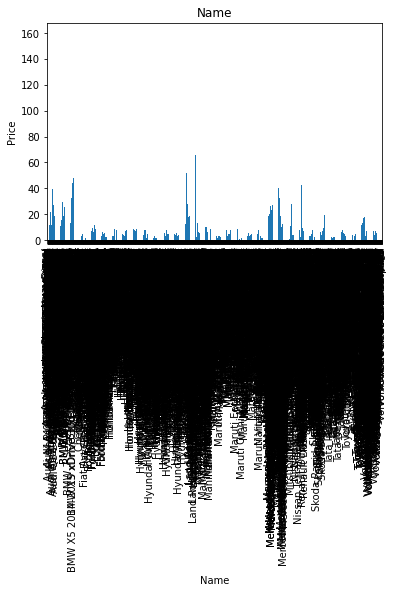

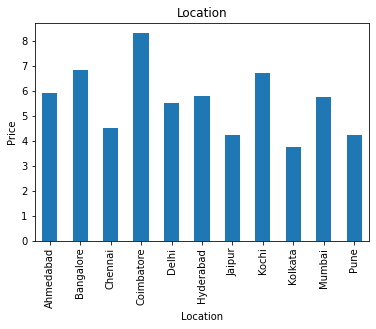

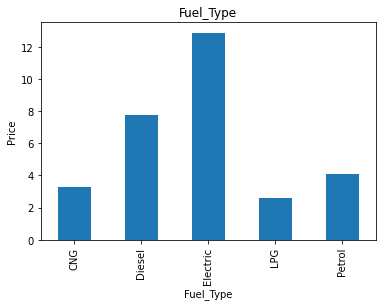

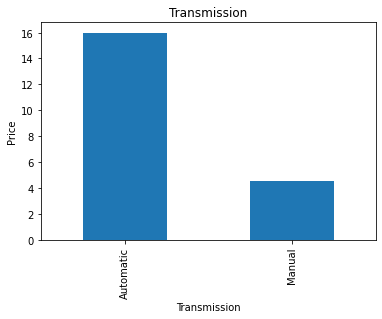

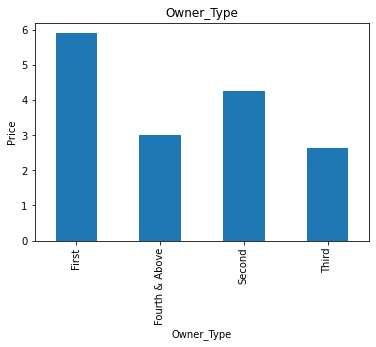

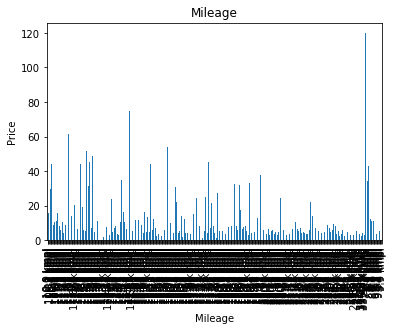

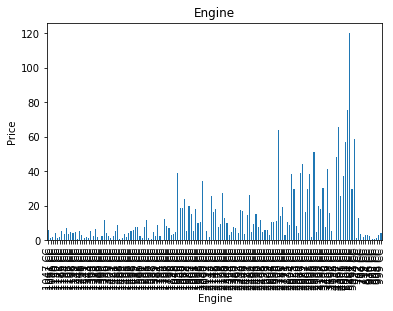

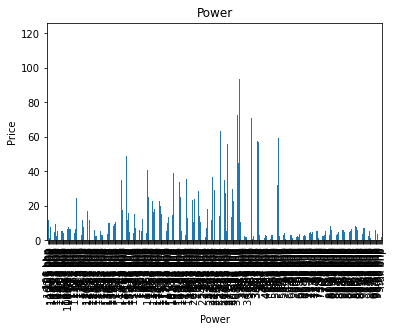

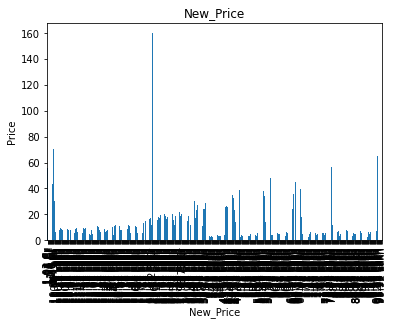

In [28]:
for i in categorical_features:
    df.groupby(i)['Price'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.title(i)
    plt.show()

In [29]:
df.corr()

,S.No.,Year,Kilometers_Driven,Seats,Price
S.No.,1.000000,0.005573,-0.007697,-0.006720,-0.020275
Year,0.005573,1.000000,-0.187859,0.008216,0.305327
Kilometers_Driven,-0.007697,-0.187859,1.000000,0.090221,-0.011493
Seats,-0.006720,0.008216,0.090221,1.000000,0.052225
Price,-0.020275,0.305327,-0.011493,0.052225,1.000000


# Feature Engineering

In [30]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [31]:
data = df.copy()

In [32]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [33]:
data = data.drop(columns=['S.No.', 'New_Price'])

In [34]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [35]:
data["Name"].dtype

dtype('O')

In [36]:
def get_brand_from_Name(d):
    lst = d.split(" ")
    return lst[0]
        
data["Name"] = list(map(get_brand_from_Name, data["Name"]))

In [37]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [38]:
data = data.rename(columns = {"Name": "Brand_Name"})

In [39]:
data.head()

,Brand_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [40]:
data["Brand_Name"].dtype

dtype('O')

In [41]:
data["Location"].dtype

dtype('O')

In [42]:
data["Year"].dtype

dtype('int64')

In [43]:
data["Year"] = list(map(lambda x: 2021-x, data["Year"]))

In [44]:
data.head()

,Brand_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,11,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,6,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,10,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,9,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,8,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [45]:
data = data.rename(columns = {"Year": "Years_Old"})

In [46]:
data.head()

,Brand_Name,Location,Years_Old,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,11,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,6,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,10,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,9,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,8,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [47]:
data["Years_Old"].dtype

dtype('int64')

In [48]:
data["Mileage"].dtype

dtype('O')

In [49]:
data["Mileage"].isnull().sum()

2

In [50]:
data["Mileage"] = data["Mileage"].str.replace(' kmpl','')
data["Mileage"] = data["Mileage"].str.replace(' km/kg','')

In [51]:
data["Mileage"].dtype

dtype('O')

In [52]:
data['Mileage'] = data['Mileage'].astype(float)

In [53]:
data["Mileage"].dtype

dtype('float64')

In [54]:
data["Mileage"].mean()

18.14158047165911

In [55]:
data["Mileage"].fillna(data["Mileage"].mean(), inplace=True)

In [56]:
data["Mileage"].isnull().sum()

0

In [57]:
data.head()

,Brand_Name,Location,Years_Old,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,11,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,6,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,10,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,9,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,8,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74


In [58]:
data["Mileage"].dtype

dtype('float64')

In [59]:
data["Engine"].dtype

dtype('O')

In [60]:
data["Engine"].isnull().sum()

46

In [61]:
data["Engine"] = data["Engine"].str.replace(' CC','')

In [62]:
data["Engine"].dtype

dtype('O')

In [63]:
data['Engine'] = data['Engine'].astype(float)

In [64]:
data["Engine"].dtype

dtype('float64')

In [65]:
data["Engine"].mean()

1616.5734702372692

In [66]:
data["Engine"].fillna(data["Engine"].mean(), inplace=True)

In [67]:
data["Engine"].isnull().sum()

0

In [68]:
data.head()

,Brand_Name,Location,Years_Old,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,11,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,1.75
1,Hyundai,Pune,6,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50
2,Honda,Chennai,10,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50
3,Maruti,Chennai,9,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,8,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74


In [69]:
data["Engine"].dtype

dtype('float64')

In [70]:
data["Power"].dtype

dtype('O')

In [71]:
data["Power"].isnull().sum()

46

In [72]:
data["Power"] = data["Power"].str.replace(' bhp','')

In [73]:
data["Power"].dtype

dtype('O')

In [74]:
data[data['Power']=='null']

,Brand_Name,Location,Years_Old,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford,Jaipur,13,111111,Diesel,Manual,First,17.80,1399.0,null,5.0,2.00
79,Hyundai,Hyderabad,16,87591,Petrol,Manual,First,0.00,1086.0,null,5.0,1.30
89,Hyundai,Hyderabad,14,73745,Petrol,Manual,First,17.00,1086.0,null,5.0,2.10
120,Hyundai,Mumbai,16,102000,Petrol,Manual,Second,17.00,1086.0,null,5.0,0.85
143,Hyundai,Kochi,13,80759,Petrol,Manual,Third,17.00,1086.0,null,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
6891,Toyota,Kolkata,8,60000,Diesel,Manual,First,23.59,1364.0,null,5.0,NaN
6896,Toyota,Hyderabad,8,86000,Diesel,Manual,First,23.59,1364.0,null,5.0,NaN
6947,Toyota,Delhi,9,77800,Petrol,Manual,First,18.30,1197.0,null,5.0,NaN
7092,Hyundai,Coimbatore,14,64168,Petrol,Automatic,First,17.00,1086.0,null,5.0,NaN


In [75]:
data["Power"] = data["Power"].str.replace('null','0')

In [76]:
data["Power"] = data["Power"].astype(float)

In [77]:
data["Power"].dtype

dtype('float64')

In [78]:
data["Power"].mean()

110.74679963923872

In [79]:
data["Power"].fillna(data["Power"].mean(), inplace=True)

In [80]:
data["Power"][data["Power"]==0] = data["Power"].mean()

<ipython-input-80-eb89be7d79b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Power"][data["Power"]==0] = data["Power"].mean()


In [81]:
data["Power"].isnull().sum()

0

In [82]:
data.head()

,Brand_Name,Location,Years_Old,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,11,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,6,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,10,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,9,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,8,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [83]:
data["Power"].dtype

dtype('float64')

In [84]:
data["Seats"].dtype

dtype('float64')

In [85]:
data["Seats"].isnull().sum()

53

In [86]:
data["Seats"].mean()

5.279722222222222

In [87]:
data["Seats"].fillna(data["Seats"].mean(), inplace=True)

In [88]:
data["Seats"].isna().sum()

0

In [89]:
data[data["Seats"]==0]

,Brand_Name,Location,Years_Old,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3999,Audi,Hyderabad,9,125000,Petrol,Automatic,First,10.5,3197.0,110.7468,0.0,18.0


In [90]:
data["Seats"][data["Seats"]==0] = data["Seats"].mean()

<ipython-input-90-7b035343beb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Seats"][data["Seats"]==0] = data["Seats"].mean()


In [91]:
data.head()

,Brand_Name,Location,Years_Old,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,11,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,6,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,10,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,9,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,8,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [92]:
data.isna().sum()

Brand_Name              0
Location                0
Years_Old               0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
dtype: int64

# Approach-1 : dropping all rows with Price as null

In [93]:
data_approach1 = data.copy()

In [94]:
data_approach1

,Brand_Name,Location,Years_Old,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,11,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,6,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,10,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,9,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,8,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen,Hyderabad,10,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN
7249,Volkswagen,Mumbai,6,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN
7250,Nissan,Kolkata,9,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN
7251,Volkswagen,Pune,8,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN


In [95]:
data_approach1.isna().sum()

Brand_Name              0
Location                0
Years_Old               0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
dtype: int64

In [98]:
data_approach1.dropna(inplace=True)

In [103]:
data_approach1

,Brand_Name,Location,Years_Old,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,11,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,6,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,10,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,9,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,8,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,7,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai,Jaipur,6,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra,Jaipur,9,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti,Kolkata,8,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [104]:
data_approach1.isna().sum()

Brand_Name           0
Location             0
Years_Old            0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [107]:
data_approach1.corr()

,Years_Old,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Years_Old,1.000000,0.173048,-0.321534,0.051652,-0.015559,-0.011784,-0.305327
Kilometers_Driven,0.173048,1.000000,-0.065253,0.091024,0.033207,0.084164,-0.011493
Mileage,-0.321534,-0.065253,1.000000,-0.588285,-0.505396,-0.306005,-0.306588
Engine,0.051652,0.091024,-0.588285,1.000000,0.859321,0.397367,0.657129
Power,-0.015559,0.033207,-0.505396,0.859321,1.000000,0.100785,0.767817
Seats,-0.011784,0.084164,-0.306005,0.397367,0.100785,1.000000,0.053134
Price,-0.305327,-0.011493,-0.306588,0.657129,0.767817,0.053134,1.000000


In [108]:
data_approach1.dtypes

Brand_Name            object
Location              object
Years_Old              int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [111]:
data_approach1 = pd.get_dummies(data_approach1, drop_first=True)

In [112]:
data_approach1

,Years_Old,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Brand_Name_Audi,Brand_Name_BMW,Brand_Name_Bentley,Brand_Name_Chevrolet,Brand_Name_Datsun,Brand_Name_Fiat,Brand_Name_Force,Brand_Name_Ford,Brand_Name_Honda,Brand_Name_Hyundai,Brand_Name_ISUZU,Brand_Name_Isuzu,Brand_Name_Jaguar,Brand_Name_Jeep,Brand_Name_Lamborghini,Brand_Name_Land,Brand_Name_Mahindra,Brand_Name_Maruti,Brand_Name_Mercedes-Benz,Brand_Name_Mini,Brand_Name_Mitsubishi,Brand_Name_Nissan,Brand_Name_Porsche,Brand_Name_Renault,Brand_Name_Skoda,Brand_Name_Smart,Brand_Name_Tata,Brand_Name_Toyota,Brand_Name_Volkswagen,Brand_Name_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,11,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,6,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,10,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,9,87000,20.77,1248.0,88.76,7.0,6.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,8,40670,15.20,1968.0,140.80,5.0,17.74,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,7,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6015,6,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
6016,9,55000,14.00,2498.0,112.00,8.0,2.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
6017,8,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0


In [126]:
data_approach1.columns

Index(['Years_Old', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand_Name_Audi', 'Brand_Name_BMW', 'Brand_Name_Bentley',
       'Brand_Name_Chevrolet', 'Brand_Name_Datsun', 'Brand_Name_Fiat',
       'Brand_Name_Force', 'Brand_Name_Ford', 'Brand_Name_Honda',
       'Brand_Name_Hyundai', 'Brand_Name_ISUZU', 'Brand_Name_Isuzu',
       'Brand_Name_Jaguar', 'Brand_Name_Jeep', 'Brand_Name_Lamborghini',
       'Brand_Name_Land', 'Brand_Name_Mahindra', 'Brand_Name_Maruti',
       'Brand_Name_Mercedes-Benz', 'Brand_Name_Mini', 'Brand_Name_Mitsubishi',
       'Brand_Name_Nissan', 'Brand_Name_Porsche', 'Brand_Name_Renault',
       'Brand_Name_Skoda', 'Brand_Name_Smart', 'Brand_Name_Tata',
       'Brand_Name_Toyota', 'Brand_Name_Volkswagen', 'Brand_Name_Volvo',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
    

In [127]:
X_approach1 = data_approach1.drop(columns=['Price'])

In [128]:
X_approach1

,Years_Old,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand_Name_Audi,Brand_Name_BMW,Brand_Name_Bentley,Brand_Name_Chevrolet,Brand_Name_Datsun,Brand_Name_Fiat,Brand_Name_Force,Brand_Name_Ford,Brand_Name_Honda,Brand_Name_Hyundai,Brand_Name_ISUZU,Brand_Name_Isuzu,Brand_Name_Jaguar,Brand_Name_Jeep,Brand_Name_Lamborghini,Brand_Name_Land,Brand_Name_Mahindra,Brand_Name_Maruti,Brand_Name_Mercedes-Benz,Brand_Name_Mini,Brand_Name_Mitsubishi,Brand_Name_Nissan,Brand_Name_Porsche,Brand_Name_Renault,Brand_Name_Skoda,Brand_Name_Smart,Brand_Name_Tata,Brand_Name_Toyota,Brand_Name_Volkswagen,Brand_Name_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,11,72000,26.60,998.0,58.16,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,6,41000,19.67,1582.0,126.20,5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,10,46000,18.20,1199.0,88.70,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,9,87000,20.77,1248.0,88.76,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,8,40670,15.20,1968.0,140.80,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,7,27365,28.40,1248.0,74.00,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6015,6,100000,24.40,1120.0,71.00,5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
6016,9,55000,14.00,2498.0,112.00,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
6017,8,46000,18.90,998.0,67.10,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0


In [129]:
y_approach1 = data_approach1["Price"]

In [130]:
y_approach1

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

In [131]:
X_approach1.corrwith(y_approach1).sort_values(ascending=False)

Power                        0.767817
Engine                       0.657129
Brand_Name_Mercedes-Benz     0.365876
Fuel_Type_Diesel             0.320645
Brand_Name_BMW               0.303592
Brand_Name_Audi              0.289977
Brand_Name_Land              0.267117
Brand_Name_Jaguar            0.205837
Brand_Name_Porsche           0.190289
Location_Coimbatore          0.172026
Brand_Name_Lamborghini       0.127351
Brand_Name_Mini              0.102550
Location_Bangalore           0.086526
Brand_Name_Bentley           0.057062
Seats                        0.053134
Location_Kochi               0.052911
Brand_Name_Toyota            0.050832
Brand_Name_Volvo             0.049314
Brand_Name_Jeep              0.041281
Brand_Name_Isuzu             0.012123
Location_Hyderabad           0.009958
Brand_Name_Mitsubishi        0.009477
Location_Delhi               0.006496
Fuel_Type_Electric           0.005534
Brand_Name_ISUZU             0.004181
Brand_Name_Force            -0.000292
Location_Mum

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [132]:
X_train_approach1, X_test_approach1, y_train_approach1, y_test_approach1 = train_test_split(X_approach1, y_approach1, test_size=0.2, random_state=10)

In [136]:
X_approach1.shape

(6019, 54)

In [137]:
X_train_approach1.shape

(4815, 54)

In [138]:
X_test_approach1.shape

(1204, 54)

In [139]:
y_approach1.shape

(6019,)

In [140]:
y_train_approach1.shape

(4815,)

In [141]:
y_test_approach1.shape

(1204,)

In [142]:
model_approach1 = LinearRegression()

In [143]:
model_approach1.fit(X_train_approach1, y_train_approach1)

LinearRegression()

In [144]:
a = model_approach1.coef_
pd.DataFrame(a, columns=["coef"], index=X_approach1.columns)

,coef
Years_Old,-0.946537
Kilometers_Driven,-0.000023
Mileage,-0.099011
Engine,0.002024
Power,0.082813
Seats,0.054024
Brand_Name_Audi,0.729949
Brand_Name_BMW,-0.037908
Brand_Name_Bentley,3.436831
Brand_Name_Chevrolet,-8.217248


In [145]:
model_approach1.intercept_

12.65441314867134

In [146]:
model_approach1.score(X_test_approach1, y_test_approach1) * 100

55.41096720555907

In [148]:
y_pred_approach1 = model_approach1.predict(X_test_approach1)
y_pred_approach1

array([-4.68467943, -5.60721667, 26.51387548, ..., 10.55274957,
       13.70569333, 10.01138013])

In [185]:
y_test_approach1

1463     1.50
181      1.45
2506    25.75
3374     8.90
5816     3.00
        ...  
3041     6.35
4348     9.75
2112     9.95
1437     9.20
2802     5.50
Name: Price, Length: 1204, dtype: float64

In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(np.sqrt(mean_squared_error(y_test_approach1, y_pred_approach1)))
print(mean_absolute_error(y_test_approach1, y_pred_approach1))
print(r2_score(y_test_approach1, y_pred_approach1) * 100)

7.0076962543763806
2.959750962485085
55.41096720555907


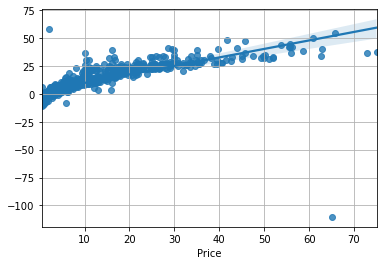

In [186]:
sns.regplot(x=y_test_approach1, y=y_pred_approach1, data=data_approach1)
plt.grid()

# Approach-2 : replacing Price as null with mean

In [151]:
data_approach2 = data.copy()

In [152]:
data_approach2

,Brand_Name,Location,Years_Old,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,11,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,6,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,10,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,9,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,8,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen,Hyderabad,10,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN
7249,Volkswagen,Mumbai,6,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN
7250,Nissan,Kolkata,9,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN
7251,Volkswagen,Pune,8,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN


In [153]:
data_approach2.isna().sum()

Brand_Name              0
Location                0
Years_Old               0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
dtype: int64

In [154]:
data_approach2["Price"].mean()

9.479468350224273

In [155]:
data_approach2["Price"].fillna(data_approach2["Price"].mean(), inplace=True)

In [156]:
data_approach2.isna().sum()

Brand_Name           0
Location             0
Years_Old            0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [157]:
data_approach2.corr()

,Years_Old,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Years_Old,1.000000,0.187859,-0.322437,0.054233,-0.014174,-0.007782,-0.279449
Kilometers_Driven,0.187859,1.000000,-0.069122,0.094765,0.029877,0.091138,-0.011318
Mileage,-0.322437,-0.069122,1.000000,-0.585023,-0.500733,-0.307960,-0.280510
Engine,0.054233,0.094765,-0.585023,1.000000,0.853313,0.402616,0.604829
Power,-0.014174,0.029877,-0.500733,0.853313,1.000000,0.095299,0.704574
Seats,-0.007782,0.091138,-0.307960,0.402616,0.095299,1.000000,0.048212
Price,-0.279449,-0.011318,-0.280510,0.604829,0.704574,0.048212,1.000000


In [158]:
data_approach2.dtypes

Brand_Name            object
Location              object
Years_Old              int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [159]:
data_approach2 = pd.get_dummies(data_approach2, drop_first=True)

In [160]:
data_approach2

,Years_Old,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Brand_Name_Audi,Brand_Name_BMW,Brand_Name_Bentley,Brand_Name_Chevrolet,Brand_Name_Datsun,Brand_Name_Fiat,Brand_Name_Force,Brand_Name_Ford,Brand_Name_Hindustan,Brand_Name_Honda,Brand_Name_Hyundai,Brand_Name_ISUZU,Brand_Name_Isuzu,Brand_Name_Jaguar,Brand_Name_Jeep,Brand_Name_Lamborghini,Brand_Name_Land,Brand_Name_Mahindra,Brand_Name_Maruti,Brand_Name_Mercedes-Benz,Brand_Name_Mini,Brand_Name_Mitsubishi,Brand_Name_Nissan,Brand_Name_OpelCorsa,Brand_Name_Porsche,Brand_Name_Renault,Brand_Name_Skoda,Brand_Name_Smart,Brand_Name_Tata,Brand_Name_Toyota,Brand_Name_Volkswagen,Brand_Name_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,11,72000,26.60,998.0,58.16,5.0,1.750000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,6,41000,19.67,1582.0,126.20,5.0,12.500000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,10,46000,18.20,1199.0,88.70,5.0,4.500000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,9,87000,20.77,1248.0,88.76,7.0,6.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,8,40670,15.20,1968.0,140.80,5.0,17.740000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,10,89411,20.54,1598.0,103.60,5.0,9.479468,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
7249,6,59000,17.21,1197.0,103.60,5.0,9.479468,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
7250,9,28000,23.08,1461.0,63.10,5.0,9.479468,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
7251,8,52262,17.20,1197.0,103.60,5.0,9.479468,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [161]:
data_approach2.columns

Index(['Years_Old', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand_Name_Audi', 'Brand_Name_BMW', 'Brand_Name_Bentley',
       'Brand_Name_Chevrolet', 'Brand_Name_Datsun', 'Brand_Name_Fiat',
       'Brand_Name_Force', 'Brand_Name_Ford', 'Brand_Name_Hindustan',
       'Brand_Name_Honda', 'Brand_Name_Hyundai', 'Brand_Name_ISUZU',
       'Brand_Name_Isuzu', 'Brand_Name_Jaguar', 'Brand_Name_Jeep',
       'Brand_Name_Lamborghini', 'Brand_Name_Land', 'Brand_Name_Mahindra',
       'Brand_Name_Maruti', 'Brand_Name_Mercedes-Benz', 'Brand_Name_Mini',
       'Brand_Name_Mitsubishi', 'Brand_Name_Nissan', 'Brand_Name_OpelCorsa',
       'Brand_Name_Porsche', 'Brand_Name_Renault', 'Brand_Name_Skoda',
       'Brand_Name_Smart', 'Brand_Name_Tata', 'Brand_Name_Toyota',
       'Brand_Name_Volkswagen', 'Brand_Name_Volvo', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Koc

In [162]:
X_approach2 = data_approach2.drop(columns=['Price'])

In [163]:
X_approach2

,Years_Old,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand_Name_Audi,Brand_Name_BMW,Brand_Name_Bentley,Brand_Name_Chevrolet,Brand_Name_Datsun,Brand_Name_Fiat,Brand_Name_Force,Brand_Name_Ford,Brand_Name_Hindustan,Brand_Name_Honda,Brand_Name_Hyundai,Brand_Name_ISUZU,Brand_Name_Isuzu,Brand_Name_Jaguar,Brand_Name_Jeep,Brand_Name_Lamborghini,Brand_Name_Land,Brand_Name_Mahindra,Brand_Name_Maruti,Brand_Name_Mercedes-Benz,Brand_Name_Mini,Brand_Name_Mitsubishi,Brand_Name_Nissan,Brand_Name_OpelCorsa,Brand_Name_Porsche,Brand_Name_Renault,Brand_Name_Skoda,Brand_Name_Smart,Brand_Name_Tata,Brand_Name_Toyota,Brand_Name_Volkswagen,Brand_Name_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,11,72000,26.60,998.0,58.16,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,6,41000,19.67,1582.0,126.20,5.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,10,46000,18.20,1199.0,88.70,5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,9,87000,20.77,1248.0,88.76,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,8,40670,15.20,1968.0,140.80,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,10,89411,20.54,1598.0,103.60,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
7249,6,59000,17.21,1197.0,103.60,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
7250,9,28000,23.08,1461.0,63.10,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
7251,8,52262,17.20,1197.0,103.60,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [164]:
y_approach2 = data_approach2["Price"]

In [165]:
y_approach2

0        1.750000
1       12.500000
2        4.500000
3        6.000000
4       17.740000
          ...    
7248     9.479468
7249     9.479468
7250     9.479468
7251     9.479468
7252     9.479468
Name: Price, Length: 7253, dtype: float64

In [166]:
X_approach2.corrwith(y_approach2).sort_values(ascending=False)

Power                        7.045737e-01
Engine                       6.048294e-01
Brand_Name_Mercedes-Benz     3.346219e-01
Fuel_Type_Diesel             2.920460e-01
Brand_Name_BMW               2.806493e-01
Brand_Name_Audi              2.638864e-01
Brand_Name_Land              2.526847e-01
Brand_Name_Jaguar            1.879002e-01
Brand_Name_Porsche           1.851790e-01
Location_Coimbatore          1.562077e-01
Brand_Name_Lamborghini       1.273496e-01
Brand_Name_Mini              9.391435e-02
Location_Bangalore           7.809753e-02
Location_Kochi               4.854132e-02
Seats                        4.821219e-02
Brand_Name_Toyota            4.580706e-02
Brand_Name_Volvo             4.271483e-02
Brand_Name_Bentley           4.035105e-02
Brand_Name_Jeep              3.668116e-02
Location_Hyderabad           9.151721e-03
Brand_Name_Isuzu             8.572495e-03
Brand_Name_Mitsubishi        8.209476e-03
Location_Delhi               5.948458e-03
Fuel_Type_Electric           5.533

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [168]:
X_train_approach2, X_test_approach2, y_train_approach2, y_test_approach2 = train_test_split(X_approach2, y_approach2, test_size=0.2, random_state=10)

In [169]:
X_approach2.shape

(7253, 56)

In [170]:
X_train_approach2.shape

(5802, 56)

In [171]:
X_test_approach2.shape

(1451, 56)

In [172]:
y_approach2.shape

(7253,)

In [174]:
y_train_approach2.shape

(5802,)

In [175]:
y_test_approach2.shape

(1451,)

In [176]:
model_approach2 = LinearRegression()

In [177]:
model_approach2.fit(X_train_approach2, y_train_approach2)

LinearRegression()

In [178]:
b = model_approach2.coef_
pd.DataFrame(b, columns=["coef"], index=X_approach2.columns)

,coef
Years_Old,-8.938630e-01
Kilometers_Driven,2.578853e-06
Mileage,-7.186161e-02
Engine,2.399894e-03
Power,6.307976e-02
Seats,-3.693168e-02
Brand_Name_Audi,8.130625e-01
Brand_Name_BMW,3.974247e-01
Brand_Name_Bentley,1.150112e+01
Brand_Name_Chevrolet,-6.874109e+00


In [179]:
model_approach2.intercept_

11.220986324391548

In [180]:
model_approach2.score(X_test_approach2, y_test_approach2) * 100

64.56597069944003

In [181]:
y_pred_approach2 = model_approach2.predict(X_test_approach2)
y_pred_approach2

array([ 6.44549027,  5.84902907, 11.4346856 , ..., 10.26940826,
       22.58739386, 24.66329053])

In [182]:
y_test_approach2

3779     4.56
4303     4.89
1875    10.10
3828     3.87
4455     6.50
        ...  
2260    17.50
2290     5.22
2392     9.20
2670    14.25
4595    31.93
Name: Price, Length: 1451, dtype: float64

In [183]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(np.sqrt(mean_squared_error(y_test_approach2, y_pred_approach2)))
print(mean_absolute_error(y_test_approach2, y_pred_approach2))
print(r2_score(y_test_approach2, y_pred_approach2) * 100)

6.40689426222618
3.2982295201280025
64.56597069944003


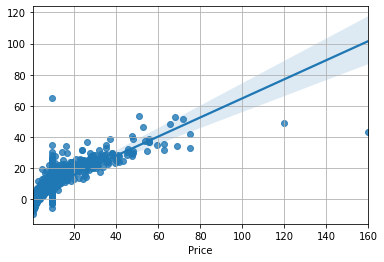

In [184]:
sns.regplot(x=y_test_approach2, y=y_pred_approach2, data=data_approach2)
plt.grid()